# Travelling Salesperson Problem (Introduction)

In these notes, we will introduce the  travelling salesperson problem (TSP). TSPs are a very important optimization problem over graphs. We will first define TSPs and motivate some of their applications. Next, we will prove that TSPs are NP-Complete. We will also prove that it is NP-Complete to approximate a general TSP to within a constant factor.

<div class="alert alert-block alert-info">
A TSP problem takes a weighted and complete graph that could be undirected or directed (as we will see below).
    <ul>
  <li> The graph has $n$ vertices that we refer to by their indices $V = \{ 1, \ldots, n \}$.
  <li> For every pair of vertices $i, j$ where $i \not= j$, there must be an edge $(i,j)$ in the graph. In other words, we will work with complete graphs.
  <li> Each edge $(i,j)$ has an edge cost denoted by $c_{ij}$.
    </ul>
</div> 

In general, a TSP is defined over a directed graph. But many  instances satisfy the _symmetry_ property wherein the graph is _undirected_ and  $c_{ij} = c_{ji}$. 

Given a graph as described above, a TSP problem seeks a _tour_ that starts at some arbitrary vertex, visits every other vertex of the graph exacty once and returns to the start point such that the total sum of all edge weights involved in the tour is as small as possible.
  - It is important to emphasize that a valid TSP tour visits all vertices of the graph exactly once except for the starting point which may be regarded as being visited twice.
  - The starting point of a TSP tour is arbitrary because it is a cycle. 
  
## Example

<div class="alert alert-block" style="border-color:black white black white">
Consider a graph shown below:

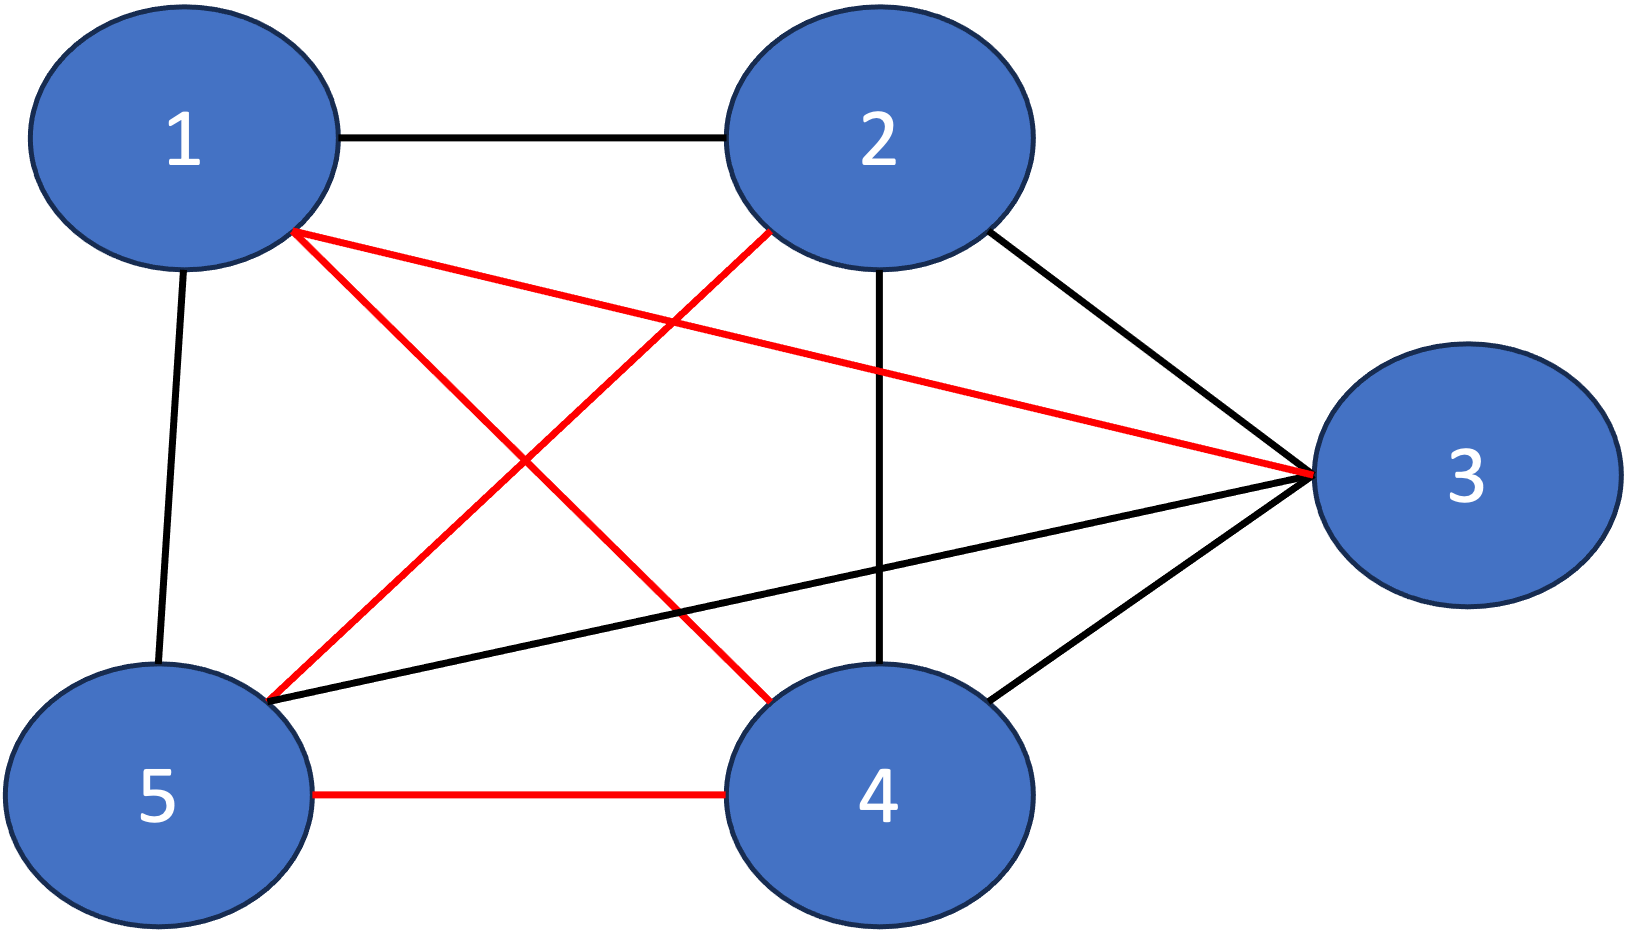


The black edges have cost $1$ and the red edges have cost $2$. The graph is undirected and represents a symmetric TSP instance $c_{ij} = c_{ji}$ for all edges $(i,j)$.

Consider the following candidates for a tour:

  - $1, 2, 3, 4, 5$ cycling back to vertex $1$ is a valid TSP tour with a total cost of $6$.
  - $1, 2, 4, 5$ cycling back to $1$ is not a valid TSP tour since it does not visit vertex $3$.
  - $1, 2, 3, 4, 5, 3$ cycling back to $1$ is not a valid TSP tour since it visits vertex $3$ twice.
  
 Is there a TSP tour of cost $5$? What is the least cost (valid) TSP tour for this graph?
 
<b> Answer: </b> $1, 2, 4, 3, 5, 1$ is a tour with cost $5$. It is also the least cost TSP tour.
 </div>

## Applications of TSP

There are many types of TSP instances and they have a wide variety of applications. For instance, the simplest application is in the area of planning package deliveries. A company such as Fedex has its vehicles visit hundreds or thousands of homes each day in a given area to deliver packages. It is important that the vehicles visit each of these homes exactly once and do so in a manner that minimizes the distance or time taken.

In fact, extensions of TSPs exist where there are more than one  "salespersons" who visit the edges of the graph and the requirement is still that each node be visited exactly once by some salesperson.  These are called vehicle routing problems. 

TSPs are used in manufacturing to schedule  the movement of a drill bit used to manufacture printed circuit boards (PCB). Here, the PCB has many locations where one needs to have holes during the manufacturing process. Optimizing the movement of the arm to visit each of these sites can save manufacturing time and energy.

TSP-like problems have applications to robotics and other areas of engineering as well. 

 
## NP-Completeness of TSP

We already saw a proof that solving the (decision version) of a TSP is NP-complete in a previous course. Recall the decision version of a TSP:
  - __Input__ A TSP instance: graph and edge weights along with a limit $K$.
  - __Output__ Does there exist a TSP tour whose total cost is $\leq K$?
  
As we saw in a previous course, this can be shown NP-complete by first proving that it belongs to NP: a proposed solution can be checked easily by checking that it is indeed a tour and its total cost is $\leq K$. To prove NP-completeness, we reduce from Hamiltonian Cycle problem.

The Hamiltonian Cycle problem is  as follows: given an undirected graph, is there a cycle that visits all the nodes in the graph precisely once?

Note the relationship to a TSP. A TSP tour is in fact a Hamiltonian cycle. However, TSPs are solved over complete graphs where there is no doubt that there exists a Hamiltonian cycle. In fact, there exists $n!$ Hamiltonian cycles in a complete graph of size $n$. The key question in TSP is to find a tour with low total cost. 
In contrast, the graph for a Hamiltonian Cycle problem is not a complete graph. It is missing many edges and thus the question of whether or not the graph has a Hamiltonian cycle becomes key. 

### Example 

<div class="alert alert-block" style="border-color:black white black white">
Consider the graph below: 

 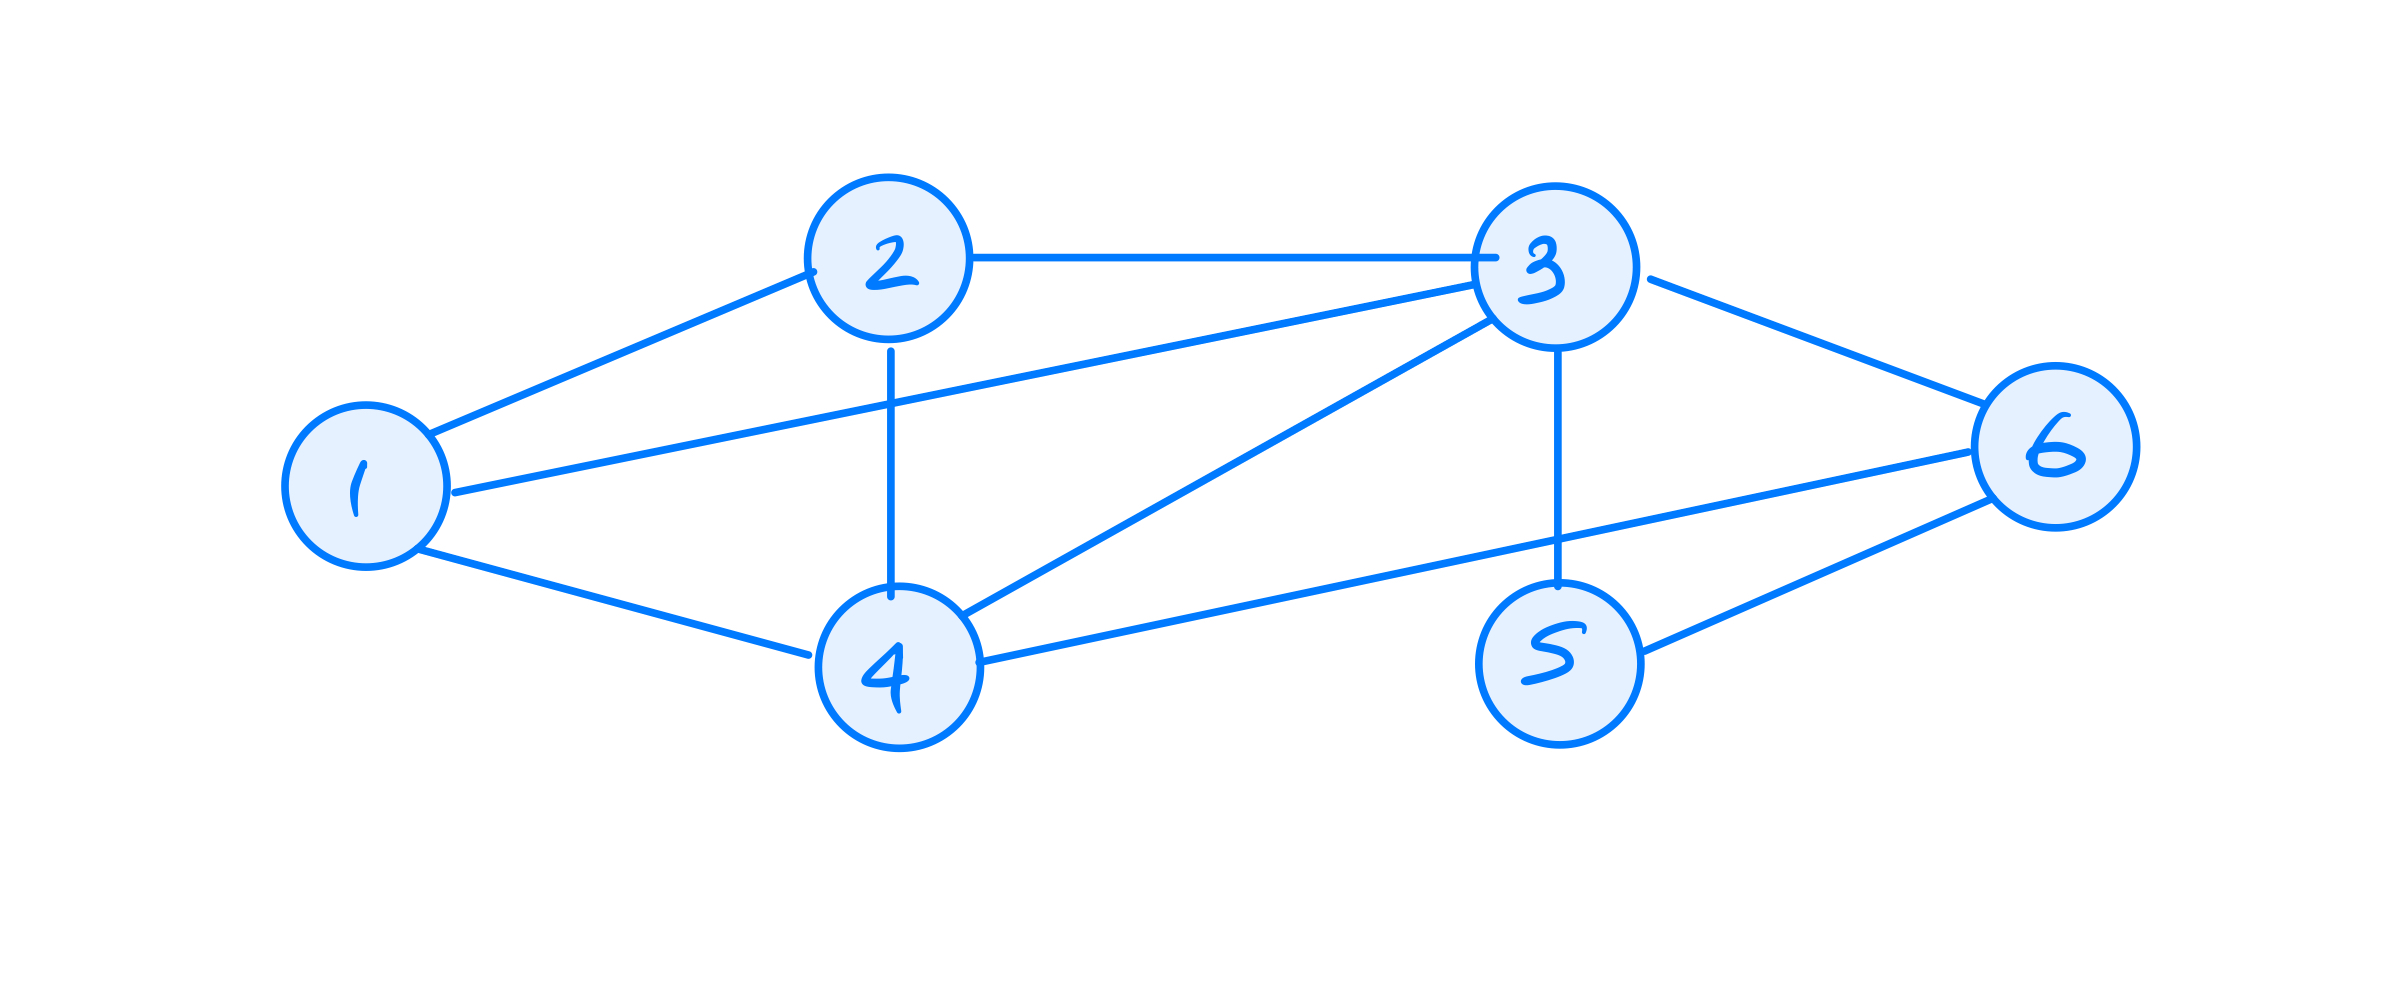


Does this graph have a Hamiltonian cycle? Indeed: $1 \rightarrow 2 \rightarrow 4 \rightarrow 6 \rightarrow 5 \rightarrow 3 \rightarrow 1$.

</div>


Richard Karp in his great 1972 paper proved that Hamiltonian cycle problem is NP-complete using a very clever reduction from 3-CNF-SAT:

<div class="alert alert-info alert-block">
            
Richard M. Karp (1972). _Reducibility Among Combinatorial Problems_. In R. E. Miller; J. W. Thatcher (eds.). Complexity of Computer Computations. New York: Plenum. pp. 85–103.
                                                                               
</div>

We can easily reduce Hamiltonian Cycle to TSP as follows:
 - Take the given graph for Hamiltonian cycle and give all the edges present in the graph a weight of $1$.
 - Add all the missing edges in the graph (remember TSPs are solved over complete graphs) but give them a weight of $2$.
 
Now we have a graph whose edges have weight $1$ if they were present in the original input graph or weight $2$ otherwise. We now ask if there exists a TSP tour whose cost is $\leq n$ in this graph. There are two possibilities:
  - There is a TSP tour of size $\leq n$. However, a TSP tour has $n$ edges in it and thus such a tour must have edge cost $1$ for all its edges. Hence, this tour indicates a Hamiltonian cycle in the original graph.
  - On the other hand, if there is no such tour, the least cost tour must have total cost $n+1$ or more. This immediately indicates that there are no Hamiltonian cycles in the original graph. 

Thus, from the answer to the TSP problem, we constructed answers the Hamiltonian cycle problem in a direct manner. As a result, TSP is NP-complete.

In fact, a simple modification of the construction above allows us to conclude that TSPs in general cannot be approximated to within a constant factor.


## Hardness of Approximating TSPs

Are there efficient algorithms that can approximate a TSP instance to within a constant factor $\alpha > 1$. In other words, we seek an algorithm that in polynomial time finds a tour of cost $T$ with the guarantee that

$$ \text{OPT} \leq T \leq \alpha \ \text{OPT}$$ 

where OPT denotes the cost of the optimal tour. We show that unless P=NP, such an algorithm cannot exist.

Let us suppose for contradiction, such an an efficient algorithm exists with some approximation factor $\alpha > 1$. We will prove that using this algorithm, we can solve the Hamiltonian cycle problem quite efficiently (or in technical terms, we reduce from the problem of Hamiltonian cycle to that of approximating TSPs).

To do so, we modify the reduction from Hamiltonian cycle that we just presented, as follows:
  - As before, if an edge exists in the original graph assign it weight $1$, as previouly described.
  - However, for edges not in the original graph, we assign them with weight $(\alpha-1) n + 2$ where $\alpha$ is the approximation ratio of the supposed constant-factor approximation algorithm. This is the main change from before. For instance, if $\alpha = 2$, we give each of these edges a cost of $n+2$. 
  
Now we ask if the TSP has a tour of total cost $\leq n$. 
  - If such a tour exists, then we conclude that the original problem has a Hamiltonian cycle.
  - On the other hand, if the original problem does not have a Hamiltonian cycle, we conclude that the least cost Hamiltonian tour must have cost at least $(\alpha -1 )n + 2 +  (n-1)$ because in the best case we can take $n-1$ edges of cost $1$ but we are forced to take at least one edge of cost $(\alpha -1) n + 2$.  Therefore, the cost of the tour must be at least $\alpha n + 1$.
  
Our claim is that the approximation algorithm can distinguish between these cases. Suppose the approximation algorithm gives an answer of $T$, we now that 

$$ \text{OPT} \leq T \leq \alpha \ \text{OPT}\; \text{or, alternatively}\; \frac{1}{\alpha} T \leq OPT \leq T$$ 

Thus if $T \leq \alpha n$, we know that the optimal tour has to be of size $\leq \alpha n$. This immediately tells us that a Hamiltonian cycle must exist in the original graph. On the other hand if $T > \alpha n$ then, we have 
$\text{OPT} \geq \frac{1}{\alpha} T  > n$. However, $\text{OPT} > n$ tells us that no Hamiltonian cycle may exist in the original graph.

Therefore, even though the approximation algorithm does not compute an optimal tour, its approximation guarantees are sufficient for us to resolve whether or not the graph has a Hamiltonian cycle by simply checking if the approximation algorithm finds tour of cost $\leq \alpha n$ or not.

This construction makes it clear that general TSPs cannot even be approximated to within a constant factor. 
                                                                               

## Metric and Euclidean TSPs

We now introduce special cases of metric and Euclidean TSPs. In many cases, TSPs correspond to graphs whose vertices are locations in the physical world and the edge costs represent distances. These distances often satisfy the mathematical properties of being a metric.

A metric TSP instance with $n$ vertices has the following properties:
  - All costs are positive: $c_{ij} > 0$.
  - It is symmetric $c_{ij} = c_{ji}$.
  - It satisfies the triangle inequality: for any three different nodes $i, j, k$, 
  $ c_{ik} \leq c_{ij}+ c_{jk}$
  
  
The triangle inquality is an important property: it says that any one side of a triangle formed by three vertices must have cost that is at most the sum of the other two sides.
  
<div> 
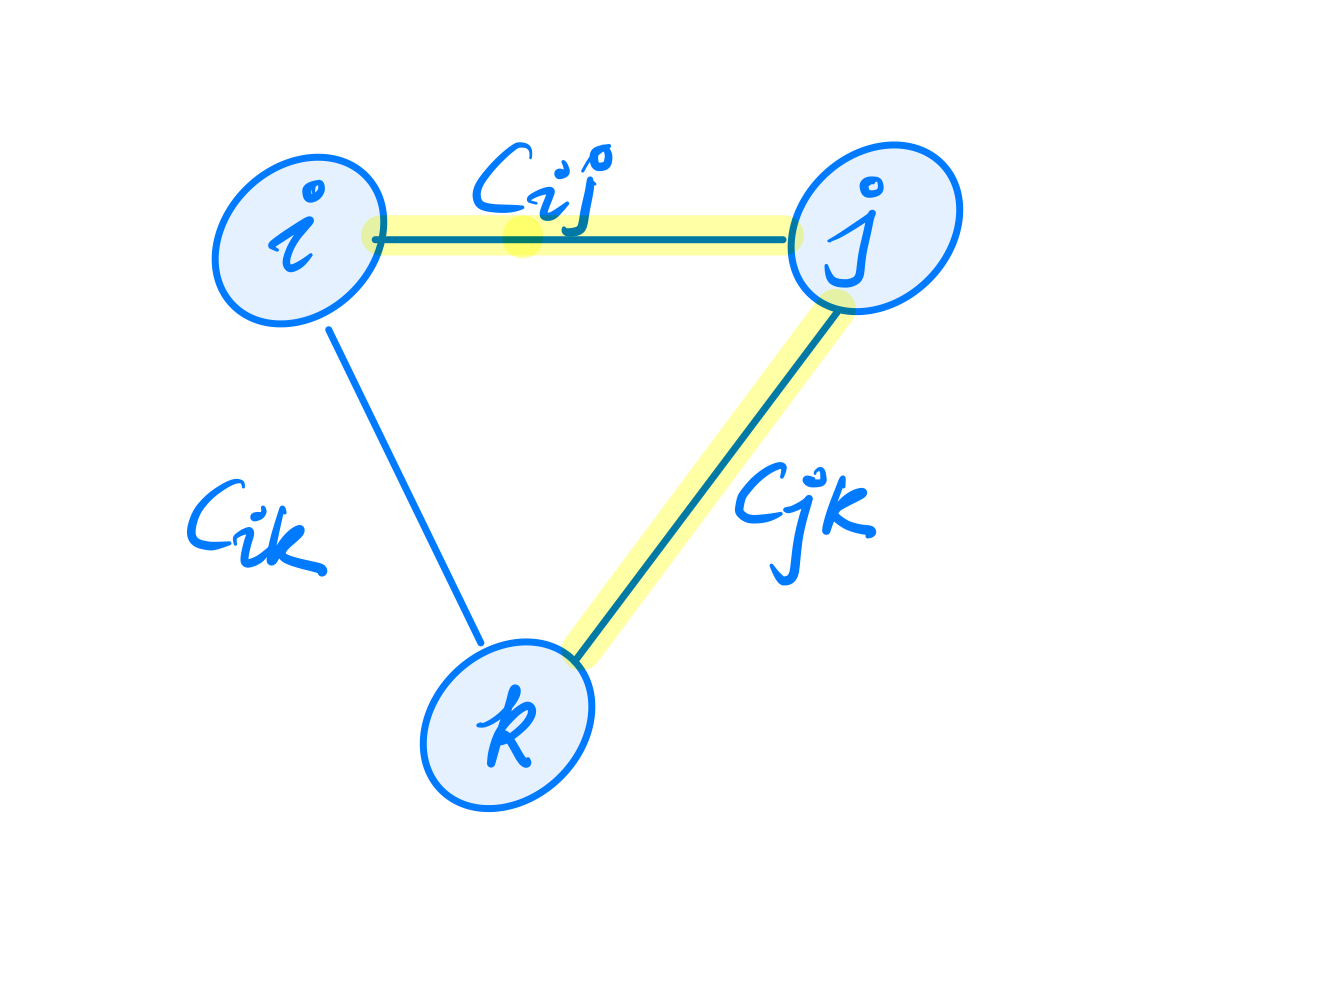
</div>


In fact, we can see that the triangle inequality extends to paths in the following way:

Consider a path $i_1 \rightarrow i_2 \rightarrow \cdots \rightarrow i_k$.

We have that the cost of the direct edge between end points $c_{i_1, i_k}$ must be less than or equal to the sum of the edge costs along the path.

$$ c_{i_1, i_k} \leq c_{i_1,i_2} + c_{i_2, i_3} + \cdots + c_{i_{k-1}, i_k}$$

Note that the construction used above to prove inapproximability of general TSPs does not apply to metric TSPs because the TSP instances we construct does not satisfy the triangle inequality. In fact, we will present a factor $1.5$ approximation for metric TSPs subsequently in this lesson.

A TSP is Euclidean if each vertex corresponds to a location $(x_i, y_i)$ on a plane and the cost $c_{ij}$ is simply the Euclidean distance between $(x_i, y_i)$ and $(x_j, y_j)$:

$$ c_{ij} = \sqrt{ (x_j - x_i)^2 + (y_j - y_i)^2 } $$

There are ways to approximate a Euclidean TSP to any constant factor $\alpha = 1 + \epsilon$. These kinds of algorithms are called approximation schemes. We will present approximation schemes briefly at the end of this module but the approximation scheme for Euclidean TSP is more complicated. See the following paper:

<div class="alert alert-block alert-info">
    Sanjeev Arora, Polynomial time approximation schemes for Euclidean traveling salesman and other geometric problems, Journal of the ACM, 45(5), 753-782, 1998.
</div>


## That's All Folks!